In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math, time

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

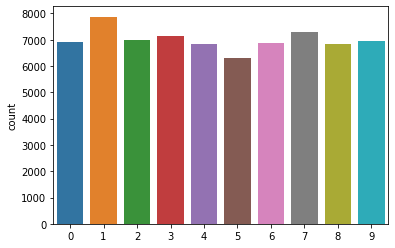

In [3]:
sns.countplot(mnist.target)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=0.2, 
                                                            stratify = mnist.target, random_state=0)

In [5]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [6]:
steps = [('scaler', StandardScaler()), ('SVM', SVC(kernel='poly'))]
pipeline = Pipeline(steps) # define Pipeline object

In [9]:
parameters = {'SVM__C':[0.001, 0.1, 100, 10e5], 'SVM__gamma':[10,1,0.1,0.01]}
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5, verbose=1, n_jobs=-1)

In [ ]:
grid.fit(train_img, train_lbl)
print("score = %3.2f" %(grid.score(test_img, test_lbl)))
print("best parameters from train data: ", grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
y_pred = grid.predict(test_img)

In [ ]:
print(classification_report(test_lbl,y_pred))

In [ ]:
for i in (np.random.randint(0,270,6)):
 two_d = (np.reshape(X_test.values[i], (28, 28)) * 255).astype(np.uint8)
 plt.title('predicted label: {0}'. format(y_pred[i]))
 plt.imshow(two_d, interpolation='nearest', cmap='gray')
 plt.show()